In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import copy
import time

from numpy.lib import stride_tricks
%matplotlib inline
import OceanPSC.operations as op
from OceanPSC.utils import load_data
from OceanPSC.Map import Map
import OceanPSC.clustering as clust
import importlib
import random
from skimage.measure import block_reduce
import cv2
import copy
import OceanPSC.DEM as d
import OceanPSC.classification as c
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage,fcluster

In [2]:

import OceanPSC.classification as c

In [1]:
importlib.reload(c)

NameError: name 'importlib' is not defined

In [196]:
ab=c.interRsl.copy()

AttributeError: 'NoneType' object has no attribute 'copy'

In [3]:
dem=c.default_dem()

In [81]:
np.save('classes.npy',classes)

In [200]:
pls,classes,final_classes=c.get_sea_classification(curvature=dem.curvature,slope=dem.slope,elevation=dem.elevation,
                                 organization=dem.organization,roughness=dem.roughness)

csh cleaned!
cslope cleaned!
c_rise cleaned!
csh cleaned!
cslope cleaned!
c_rise cleaned!


In [580]:
np.save('clsss.npy',classes)
np.save('clsssf.npy',fin_c)

In [108]:
classes[(propagation==0)&(c.big_categories['CONTINENTAL_SLOPE'](classes))]=c.SEAMOUNT

In [572]:
classes[0,0]=c.CONTINENTAL_SHELF

In [135]:
classes[classes==11]=c.CONTINENTAL_RISE

In [21]:
marqued.shape

(3800, 10800)

In [22]:
classes.shape

(3800, 10800)

In [282]:
classes[marqued==1]=c.SEAMOUNT

In [4]:
def propag_on(start,target,dist=0):
    cpt=0
    old=-1
    validation=start.copy()
    if target is None:
        target=np.ones_like(classes,dtype=np.bool)
    while True:
        filt=np.ones((3,3))
        filt[0,0]=filt[2,2]=filt[0,2]=filt[2,0]=0
        neighborhood=(op.neighbor_grid(validation)*filt).sum(axis=(-1,-2))>0
        validation[(target)&(neighborhood)]=1
        #round earth fix
        validation[:,0][((validation[:,-1]==1)&(target[:,0]))]=1
        if cpt%10==0:
            print(cpt,validation.mean()*100)
            if old==validation.sum():
                break
            old=validation.sum()
        cpt+=1
        if (dist>0) and (cpt>dist):
            break
    return validation

In [592]:
np.save('ncl.npy',classes)

In [389]:
sclasses=np.load('sncl.npy')

In [168]:
classes=np.load('ncl.npy')

In [258]:
classes[(img==0)&(classes==c.MID_OCEANIC_RIDGE)]=42

In [401]:
marqued=(cla2==c.MID_OCEANIC_RIDGE)

In [575]:
dmar[rem]=0

In [398]:
cla2=classes.copy()
cla2[img==1]=c.MID_OCEANIC_RIDGE

In [40]:
cll2=classes.copy()

In [390]:
np.where(classes.flatten()>1)

(array([       0,        1,        2, ..., 41039997, 41039998, 41039999],
       dtype=int64),)

In [99]:
classes=cll2

In [52]:
classes[(img==1)&c.big_categories['ROUGH_SEAFLOOR'](classes)]=c.ABYSSAL_PLAIN

In [258]:
img=np.float32(classes==c.VERY_ROUGH_SEAFLOOR)
kernel = np.ones((5,5),np.uint8)
img = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel, iterations=2)
img = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel, iterations=3)
img = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel, iterations=6)
classes[(img==1)&(c.big_categories['ROUGH_SEAFLOOR'](classes))]=c.VERY_ROUGH_SEAFLOOR

img=np.float32(classes==c.ROUGH_SEAFLOOR)
kernel = np.ones((5,5),np.uint8)
img = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel, iterations=2)
img = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel, iterations=4)
classes[(img==1)&(classes==c.VERY_ROUGH_SEAFLOOR)]=c.ROUGH_SEAFLOOR

In [383]:
img=np.float32(c.big_categories['ABYSSAL_PLAIN'](classes))
kernel = np.ones((5,5),np.uint8)
img = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel, iterations=1)
img = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel, iterations=5)
img = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel, iterations=5)
img = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel, iterations=15)
img = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel, iterations=15)
img = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel, iterations=50)
img = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel, iterations=30)
classes[(img==1)&(c.big_categories['ROUGH_SEAFLOOR'](classes))]=c.ABYSSAL_PLAIN

img=np.float32(c.big_categories['ROUGH_SEAFLOOR'](classes)|c.big_categories['MID_OCEANIC_RIDGE'](classes))

kernel = np.ones((5,5),np.uint8)
img = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel, iterations=3)
img = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel, iterations=10)
classes[(img==1)&(c.big_categories['BIG_ABP'](classes))]=c.ROUGH_SEAFLOOR

In [34]:
img=np.float32(classes==c.SEAMOUNT)
kernel = np.ones((5,5),np.uint8)
img = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel, iterations=3)
classes[(img==1)&((c.big_categories['BIG_ABP'](classes))|(classes==c.big_categories['ROUGH_SEAFLOOR']))]=c.SEAMOUNT

In [32]:
img=np.float32(c.big_categories['ABYSSAL_PLAIN'](classes))
kernel = np.ones((5,5),np.uint8)
img = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel, iterations=2)
img = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel, iterations=3)
classes[(img==1)&(classes==c.SEAMOUNT)]=c.ABYSSAL_PLAIN

img=np.float32(c.big_categories['CONTINENTAL_RISE'](classes))
kernel = np.ones((5,5),np.uint8)
img = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel, iterations=2)
img = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel, iterations=3)
classes[(img==1)&(classes==c.SEAMOUNT)]=c.CONTINENTAL_RISE

In [386]:
img=np.float32(classes==c.MID_OCEANIC_RIDGE)
kernel = np.ones((5,5),np.uint8)
img = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel, iterations=7)
classes[(img==1)&(c.big_categories['ABYSSAL_PLAIN'](classes))]=c.MID_OCEANIC_RIDGE
classes[(img==1)&(c.big_categories['ROUGH_SEAFLOOR'](classes))]=c.MID_OCEANIC_RIDGE

In [37]:
classes=clean(classes,1)
classes=clean(classes,2)

In [ ]:

dmar=consolidate_numbers(marqued)
def reduce_nums(dmar):
    sizes=[]
    ls=np.unique(dmar)
    for k in range(len(ls)):
        sizes.append((dmar==ls[k]).sum())
        dmar[dmar==ls[k]]=k
    sizes=np.array(sizes)
    return sizes


sizes=reduce_nums(dmar)
dmar=np.int32(dmar)
deletion=dmar[sizes[dmar]<=100]

#small components are removed via the adjacency method
for k in np.unique(deletion):
    if k!=0:
        opc=op.neighbor_grid(classes)[dmar==k].flatten()
        opc=opc[~big_categories['MID_OCEANIC_RIDGE'](opc)]
        arg=np.argmax(np.bincount(np.int32(opc)))
        classes[(dmar==k)&big_categories['MID_OCEANIC_RIDGE'](classes)]=arg

for k in np.unique(deletion):
    dmar[dmar==k]=0

#larger components (but not large enough) are removed via "most likely alternative" method
sizes=reduce_nums(dmar)
dmar=np.int32(dmar)


In [176]:
def consolidate_numbers(marqued):
    """Label each connected component of a binary image. (each connected groupe of ones has a label, and all zeros are labeled zero)"""
    def step_numbers(direction,dmar):
        """direction: horizontal +:1, -:2, vertical +: 3, vertical -: 4"""
        cpt=0
        if direction == 1 or direction == 2:
            eq_next=(dmar[:,1:]!=0)&(dmar[:,:-1]!=0)
        else:
            eq_next=(dmar[1:,:]!=0)&(dmar[:-1,:]!=0)
        while True:
            pre_numbers=dmar.copy()
            if direction ==1:
                dmar[:,1:][eq_next]=dmar[:,:-1][eq_next]
            elif direction == 2:
                dmar[:,:-1][eq_next]=dmar[:,1:][eq_next]
            elif direction == 3:
                dmar[1:,:][eq_next]=dmar[:-1,:][eq_next]
            else:
                dmar[:-1,:][eq_next]=dmar[1:,:][eq_next]
            if cpt % 100 == 0:
                m=(pre_numbers!=dmar).mean()
                if m==0:
                    break
            cpt+=1

    dar=np.zeros_like(classes)
    dar[marqued==1]=1+np.arange(int(marqued.sum()))
    for k in range(10):
        old=len(np.unique(dar))
        randx=np.random.rand()>0.5
        randy=np.random.rand()>0.5
        s1=1+int(randx)
        s2=3+int(randy)
        step_numbers(s1,dar)
        step_numbers(s2,dar)
        nov=len(np.unique(dar))
        if old==nov:
            break

    eq_bord=(dar[:,-1]!=0)&(dar[:,0]!=0)
    dar[:,0][eq_bord]=dar[:,-1][eq_bord]

    while True:
        cpt=0
        filtr=np.ones((3,3))
        filtr[0,0]=filtr[2,2]=filtr[2,0]=filtr[0,2]=0
        filtr[1,1]=0
        dt=np.int32(op.neighbor_grid(dar)*filtr)
        ls=np.unique(dar)
        prev=len(ls)
        for k in ls:
            if k!=0 and (dar==k).sum()>0:
                dta=dt[dar==k]
                js=np.unique(dta[(dta!=k)&(dta!=0)])
                for j in js:
                    if j>k:
                        dar[dar==j]=k
        fin=len(np.unique(dar))
        if fin==prev:
            break
    return dar


In [177]:
dmar=consolidate_numbers(marqued)
def reduce_nums(dmar):
    sizes=[]
    ls=np.unique(dmar)
    for k in range(len(ls)):
        sizes.append((dmar==ls[k]).sum())
        dmar[dmar==ls[k]]=k
    sizes=np.array(sizes)
    return sizes


sizes=reduce_nums(dmar)
dmar=np.int32(dmar)
deletion=dmar[sizes[dmar]<=100]

#small components are removed via the adjacency method
for k in np.unique(deletion):
    if k!=0:
        opc=op.neighbor_grid(classes)[dmar==k].flatten()
        opc=opc[~big_categories['MID_OCEANIC_RIDGE'](opc)]
        arg=np.argmax(np.bincount(np.int32(opc)))
        classes[(dmar==k)&big_categories['MID_OCEANIC_RIDGE'](classes)]=arg

for k in np.unique(deletion):
    dmar[dmar==k]=0

#larger components (but not large enough) are removed via "most likely alternative" method
sizes=reduce_nums(dmar)
dmar=np.int32(dmar)


ValueError: attempt to get argmax of an empty sequence

In [205]:
def dens(cla,axis):
    rsl=np.zeros((cla.shape[0],cla.shape[1],11))
    for i in range(11):
        rsl[:,:,i]=(cla==i).mean(axis=axis)
    return rsl

cll=block_reduce(classes,(5,5),dens)
fin_c=np.argmax(cll,axis=-1)
fin_c[(cll[:,:,VERY_ROUGH_SEAFLOOR]-cll[:,:,ABYSSAL_PLAIN]-cll[:,:,CONTINENTAL_RISE])>0.35]=VERY_ROUGH_SEAFLOOR

cl2c=fin_c.copy()
fin_c=clean(fin_c,1)
fin_c[cl2c==LAND]=LAND

final_classes=np.zeros_like(classes)
I,J=np.indices(final_classes.shape)
I,J=block_reduce(I,(5,5),lambda x,axis: x),block_reduce(J,(5,5),lambda x,axis: x)
for k in range(SEAMOUNT+1):
    final_classes[I[fin_c==k,:,:],J[fin_c==k,:,:]]=k



In [4]:
final_classes=np.load('final_classes.npy')

In [5]:
classes=final_classes.copy()

In [9]:

import OceanPSC.classification as c

In [8]:


img=np.float32(big_categories['ABYSSAL_PLAIN'](classes))
kernel = np.ones((5,5),np.uint8)
img = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel, iterations=1)
img = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel, iterations=5)
classes[(img==1)&(big_categories['MID_OCEANIC_RIDGE'](classes))]=ABYSSAL_PLAIN

img=np.float32(big_categories['ROUGH_SEAFLOOR'](classes)|big_categories['ABYSSAL_PLAIN'](classes))
kernel = np.ones((5,5),np.uint8)
img = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel, iterations=1)
img = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel, iterations=2)
classes[(img==1)&(big_categories['MID_OCEANIC_RIDGE'](classes))]=ROUGH_SEAFLOOR



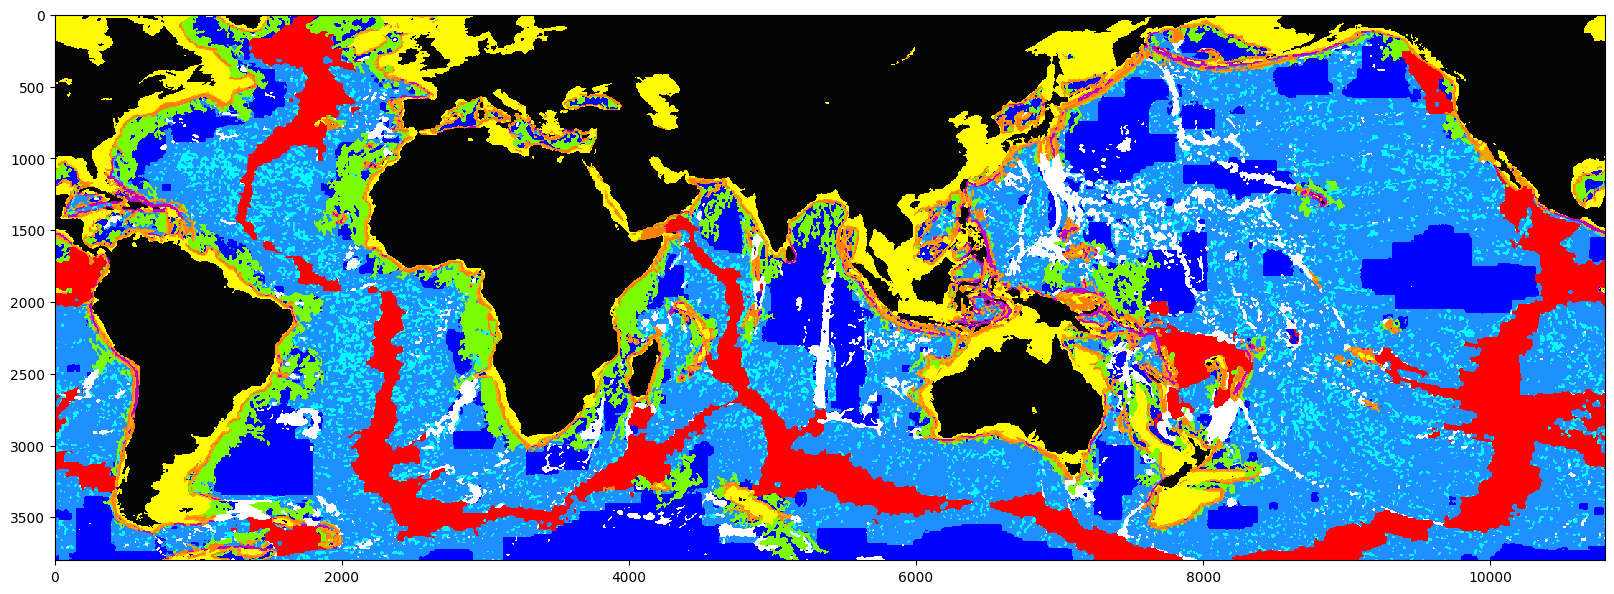

In [10]:
plt.figure(figsize=(20,10),dpi=100)
plt.imshow(classes,cmap=c.class_color_map,interpolation='nearest')

In [153]:
img=np.float32(big_categories['MID_OCEANIC_RIDGE'](old))
kernel = np.ones((6,6),np.uint8)
img = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel, iterations=6)
img = cv2.morphologyEx(img, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_CROSS,(7,7)), iterations=7)


In [253]:
rr=np.load('data/earth_data.npy')

In [9]:
c2=classes.copy()

In [11]:
from OceanPSC.classification import *

In [112]:
classes=old.copy()


In [77]:
np.pad?

In [117]:
classes=old.copy()

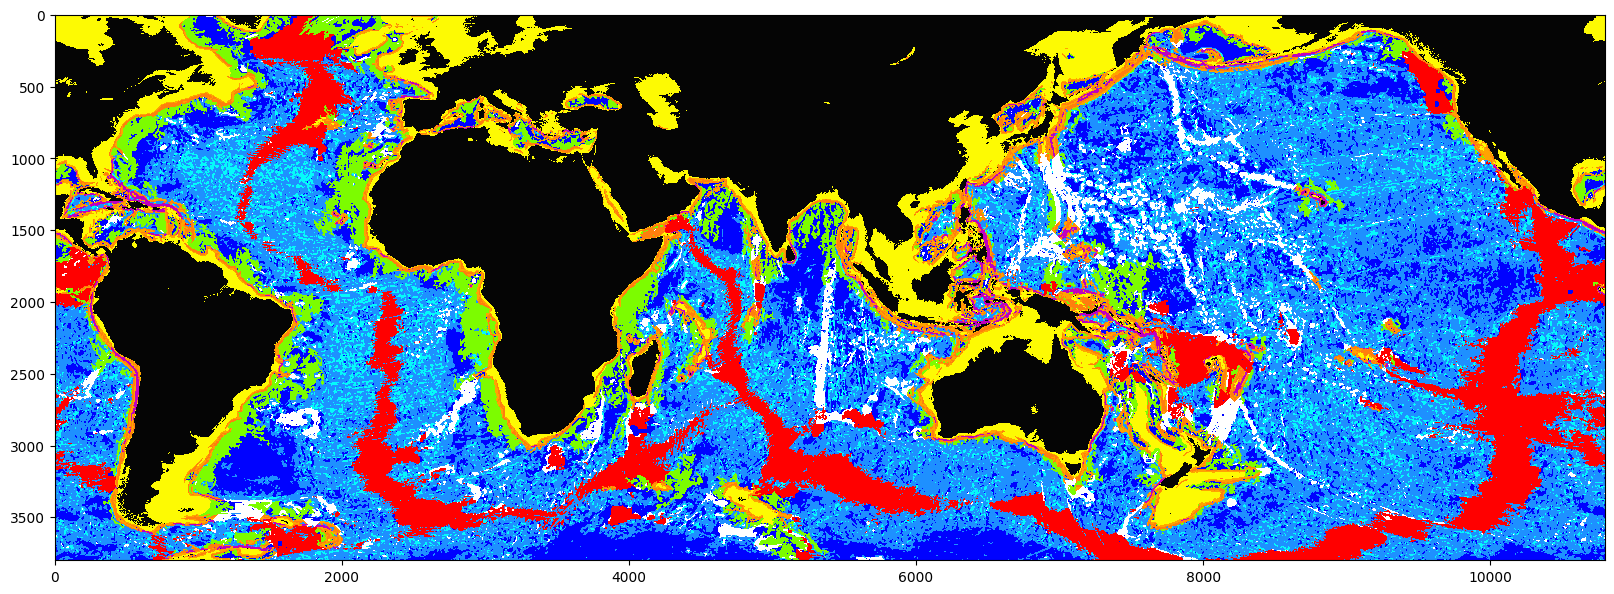

In [118]:
plt.figure(figsize=(20,10),dpi=100)
plt.imshow(classes,cmap=class_color_map,interpolation='nearest')

In [38]:
classes=final_classes.copy()

In [39]:
classes[(classes==c.MID_OCEANIC_RIDGE)&(dem.elevation<-3500)]=c.ROUGH_SEAFLOOR

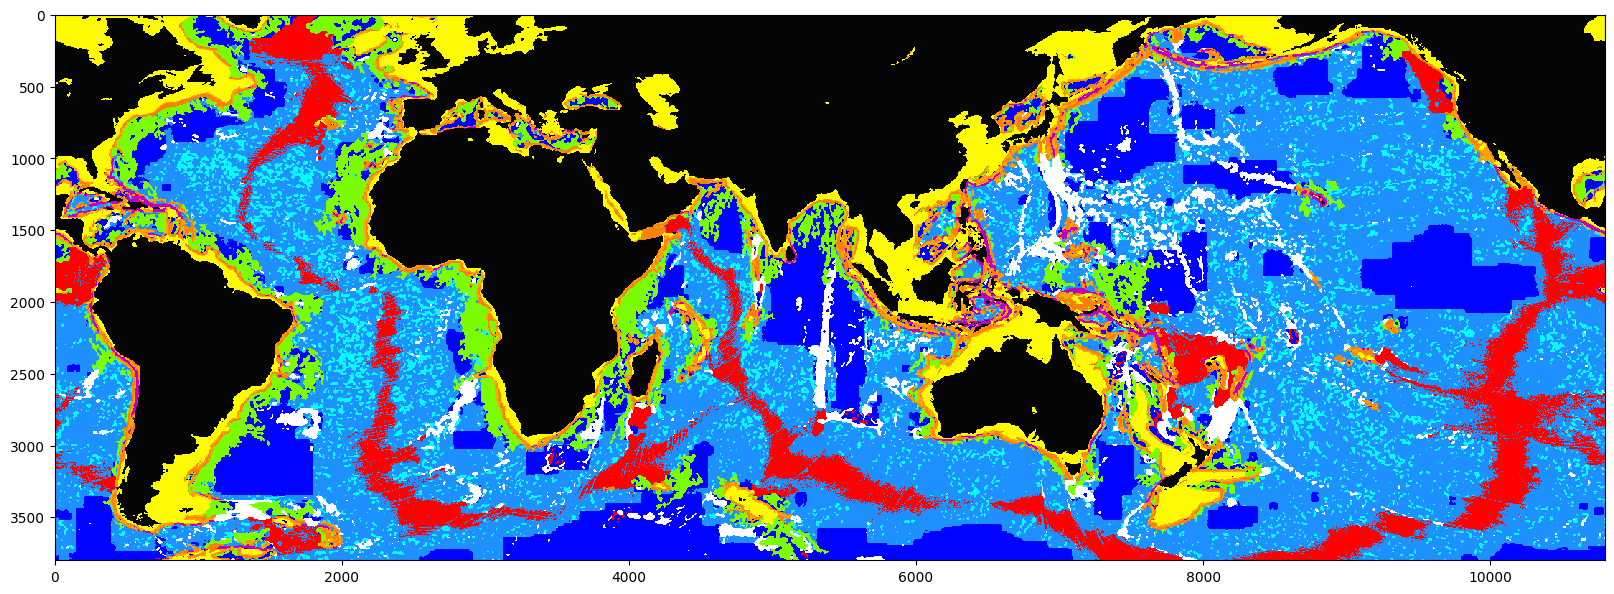

In [40]:
plt.figure(figsize=(20,10),dpi=100)
plt.imshow(classes,cmap=c.class_color_map,interpolation='nearest')

In [262]:
np.save('final_classes.npy',final_classes)

In [5]:
final_classes=np.load('final_classes.npy')

In [409]:
redelev=block_reduce(dem.elevation,(5,5),np.mean)

In [183]:
fin_c=clean(fin_c,1)

In [14]:
def dens(cla,axis):
    rsl=np.zeros((cla.shape[0],cla.shape[1],11))
    for i in range(11):
        rsl[:,:,i]=(cla==i).mean(axis=axis)
    return rsl

In [434]:

cll=block_reduce(classes,(5,5),dens)
fin_c=np.argmax(cll,axis=-1)
fin_c[(cll[:,:,c.VERY_ROUGH_SEAFLOOR]-cll[:,:,c.ABYSSAL_PLAIN]-cll[:,:,c.CONTINENTAL_RISE])>0.35]=c.VERY_ROUGH_SEAFLOOR

cl2c=fin_c.copy()
fin_c=clean(fin_c,1)
fin_c[cl2c==c.LAND]=c.LAND

fin_c[495:590,540:590][c.big_categories['CONTINENTAL_SLOPE'](fin_c[495:590,540:590])]=c.SEAMOUNT
fin_c[495:590,540:590][c.big_categories['CONTINENTAL_RISE'](fin_c[495:590,540:590])]=c.ABYSSAL_PLAIN
fin_c[490:510,590:596]=c.CONTINENTAL_RISE
fin_c[299:306,820:852][fin_c[299:306,820:852]==5]=0
fin_c[50:150,400:600][fin_c[50:150,400:600]==c.MID_OCEANIC_RIDGE]=c.ROUGH_SEAFLOOR

In [ ]:
fin_c[100:200,410:600][fin_c[100:200,410:600]==c.MID_OCEANIC_RIDGE]=c.ROUGH_SEAFLOOR

In [569]:
freqs.shape

(760, 2160, 11)

In [12]:
def dens(cla,axis):
    rsl=np.zeros((cla.shape[0],cla.shape[1],11))
    for i in range(11):
        rsl[:,:,i]=(cla==i).mean(axis=axis)
    return rsl

cll=block_reduce(classes,(5,5),dens)
fin_c=np.argmax(cll,axis=-1)

In [224]:
fin_c.shape

(760, 2160)

In [226]:
freqs=dens(op.neighbor_grid(fin_c,neighbor_dist=7),axis=(-1,-2))

In [270]:
c_rise_abp_transition.sum()

13263

In [260]:
full_abp.sum()

26133

(760, 2160, 11)

In [18]:
rr=np.load('data/earth_data.npy')

In [234]:

apb_rs_transition=((freqs[:,:,c.ROUGH_SEAFLOOR]+freqs[:,:,c.VERY_ROUGH_SEAFLOOR])>0.35)&(freqs[:,:,c.ABYSSAL_PLAIN]>0.35)

rs_mor_transition=((freqs[:,:,c.ROUGH_SEAFLOOR]+freqs[:,:,c.VERY_ROUGH_SEAFLOOR])>0.35)&(freqs[:,:,c.MID_OCEANIC_RIDGE]>0.35)

c_rise_abp_transition=(freqs[:,:,c.CONTINENTAL_RISE]>0.35)&(freqs[:,:,c.ABYSSAL_PLAIN]>0.35)
c_rise_abp_transition=c_rise_abp_transition&((freqs[:,:,c.ABYSSAL_PLAIN]+freqs[:,:,c.CONTINENTAL_RISE])>0.9)


In [17]:
freqs=dens(op.neighbor_grid(fin_c,neighbor_dist=7),axis=(-1,-2))

full_coast=(freqs[:,:,c.CONTINENTAL_SHELF]==1)
full_c_rise=(freqs[:,:,c.CONTINENTAL_RISE]>0.6)&((freqs[:,:,c.ABYSSAL_PLAIN]+freqs[:,:,c.CONTINENTAL_RISE])>0.95)
full_abp=(freqs[:,:,c.ABYSSAL_PLAIN]==1)
full_rs=(freqs[:,:,c.ROUGH_SEAFLOOR]>0.8)&((freqs[:,:,c.ROUGH_SEAFLOOR]+freqs[:,:,c.VERY_ROUGH_SEAFLOOR])==1)
full_vrs=(freqs[:,:,c.VERY_ROUGH_SEAFLOOR]>0.4)&((freqs[:,:,c.ROUGH_SEAFLOOR]+freqs[:,:,c.VERY_ROUGH_SEAFLOOR])==1)
full_mor=(freqs[:,:,c.MID_OCEANIC_RIDGE]==1)
land_coast=(freqs[:,:,c.CONTINENTAL_SHELF]>0.35)&(freqs[:,:,c.LAND]>0.35)



passive_slope=(freqs[:,:,c.CONTINENTAL_RISE]>0.1)&(freqs[:,:,c.CONTINENTAL_SHELF]>0.2)
passive_slope=passive_slope&((freqs[:,:,c.LOWER_CONTINENTAL_SLOPE]+freqs[:,:,c.UPPER_CONTINENTAL_SLOPE])>0.3)
passive_slope=passive_slope&(freqs[:,:,c.SCARPS]<0.01)
passive_slope=passive_slope&((freqs[:,:,c.CONTINENTAL_SHELF]+freqs[:,:,c.UPPER_CONTINENTAL_SLOPE]+
                              freqs[:,:,c.LOWER_CONTINENTAL_SLOPE]+freqs[:,:,c.CONTINENTAL_RISE])>0.8)
passive_slope=passive_slope&((freqs[:,:,c.ROUGH_SEAFLOOR]+freqs[:,:,c.VERY_ROUGH_SEAFLOOR])<0.05)

active_slope=((freqs[:,:,c.LAND]+freqs[:,:,c.CONTINENTAL_SHELF])>0.2)&((freqs[:,:,c.LOWER_CONTINENTAL_SLOPE]+
                                                                        freqs[:,:,c.UPPER_CONTINENTAL_SLOPE]+
                                                                        freqs[:,:,c.SCARPS])>0.3)
active_slope=active_slope&(freqs[:,:,c.SCARPS]>0.1)&(freqs[:,:,c.CONTINENTAL_RISE]<0.05)
active_slope=active_slope&((freqs[:,:,c.ROUGH_SEAFLOOR]+freqs[:,:,c.VERY_ROUGH_SEAFLOOR]+freqs[:,:,c.ABYSSAL_PLAIN])>0.1)



seamount_in_abp=(freqs[:,:,c.ABYSSAL_PLAIN]>0.4)&(freqs[:,:,c.SEAMOUNT]>0.3)&((freqs[:,:,c.ABYSSAL_PLAIN]+
                                                                               freqs[:,:,c.SEAMOUNT])>0.95)
seamount_in_rs=((freqs[:,:,c.ROUGH_SEAFLOOR]+freqs[:,:,c.VERY_ROUGH_SEAFLOOR])>0.4)&(freqs[:,:,c.SEAMOUNT]>0.3)



In [19]:
categs=[full_coast,full_abp,full_c_rise,full_mor,full_rs,full_vrs,land_coast,
        passive_slope,active_slope,seamount_in_abp,seamount_in_rs]

In [20]:
names=['csh','abp','cr','mor','rs','vrs','land_csh',
        'passive_margin','active_margin','s_abp','s_rs']

In [292]:
rr2prime

array([[-469., -470., -470., ..., -462., -465., -468.],
       [-471., -472., -472., ..., -466., -469., -470.],
       [-472., -472., -472., ..., -469., -471., -472.],
       ...,
       [-412., -415., -411., ..., -384., -394., -402.],
       [-389., -379., -362., ..., -385., -392., -392.],
       [-287., -272., -262., ..., -303., -304., -301.]])

In [258]:
rr2=rr[600:-600,:]

In [272]:
rr=np.load('data/earth_data.npy')

In [21]:
rr2prime=np.zeros((rr.shape[0],rr.shape[1]+148))
rr2prime[:,0:rr.shape[1]]=rr
rr2prime[:,148:]=rr
rr2prime=np.int32(rr2prime)
everything=op.neighbor_grid(rr2prime,neighbor_dist=74)
everything=everything[600:-600,74:-74,:,:]

In [276]:
everything.shape

(7600, 21600, 149, 149)

In [282]:
simg=cv2.resize(everything[0,0],(128,128))

In [290]:
rr2prime=np

array([[-469., -470., -470., ..., -462., -465., -468.],
       [-471., -472., -472., ..., -466., -469., -470.],
       [-472., -472., -472., ..., -469., -471., -472.],
       ...,
       [-412., -415., -411., ..., -384., -394., -402.],
       [-389., -379., -362., ..., -385., -392., -392.],
       [-287., -272., -262., ..., -303., -304., -301.]])

In [307]:
active_slope.sum()

3522

In [25]:

I,J=np.where(data)

In [52]:
names

['csh',
 'abp',
 'cr',
 'mor',
 'rs',
 'vrs',
 'land_csh',
 'passive_margin',
 'active_margin',
 's_abp',
 's_rs']

In [47]:
names[6]

'land_csh'

In [80]:
data=categs[4].copy()
dta=block_reduce(data,(2,2),np.mean)>0
datf=np.zeros_like(categs[10])
I,J=np.where(dta)
datf[2*I,2*J]=1
datf=datf>0
I,J=np.where(datf)
points=[(i,j) for i,j in zip(I,J)]
len(points)

40661

16696

In [ ]:
result=[]
if len(points)>10000:
    for p in points:
        

In [54]:
fffabp=full_abp.copy()

In [ ]:
fffabp[]

In [320]:
points=np.array(points,dtype=np.int32)

In [ ]:
KMeans(n_clusters=10000).fit(points)

In [ ]:
points=categs[j]


In [316]:

from sklearn.cluster import KMeans

In [241]:
import os

In [303]:
for name in names:
    os.mkdir(f'dataset/{name}')

In [308]:

for j in range(len(categs)):
    I,J=np.where(categs[j])
    slic=10000
    m=len(I)//(slic)
    cpt=0
    for i in range(m+1):
        if i==m:
            I1=I[i*slic:]
            J1=I[i*slic:]
        else:
            I1=I[i*slic:(i+1)*slic]
            J1=J[i*slic:(i+1)*slic]
        data=everything[I1*10,J1*10]
        for img in data:
            simg=cv2.resize(np.float32(img),(128,128))
            np.save(f'dataset/{names[j]}/img{cpt}.npy',simg)
            cpt+=1


OSError: 16384 requested and 0 written

In [340]:
data.shape

(18030, 75, 75)

In [244]:
def expand(img):
    real_classes=np.zeros((img.shape[0]*5,img.shape[1]*5),dtype=np.uint8)
    I,J=np.indices(real_classes.shape)
    I,J=block_reduce(I,(5,5),lambda x,axis: x),block_reduce(J,(5,5),lambda x,axis: x)
    real_classes[I[img,:,:],J[img,:,:]]=1
    return real_classes

In [276]:
apb_rs_transition.sum()

27518

In [191]:
full_c_rise.sum()

14353

In [192]:
land_coast.sum()

15265

In [24]:
c.CONTINENTAL_SHELF

7

In [571]:
real_classes=np.zeros_like(classes)

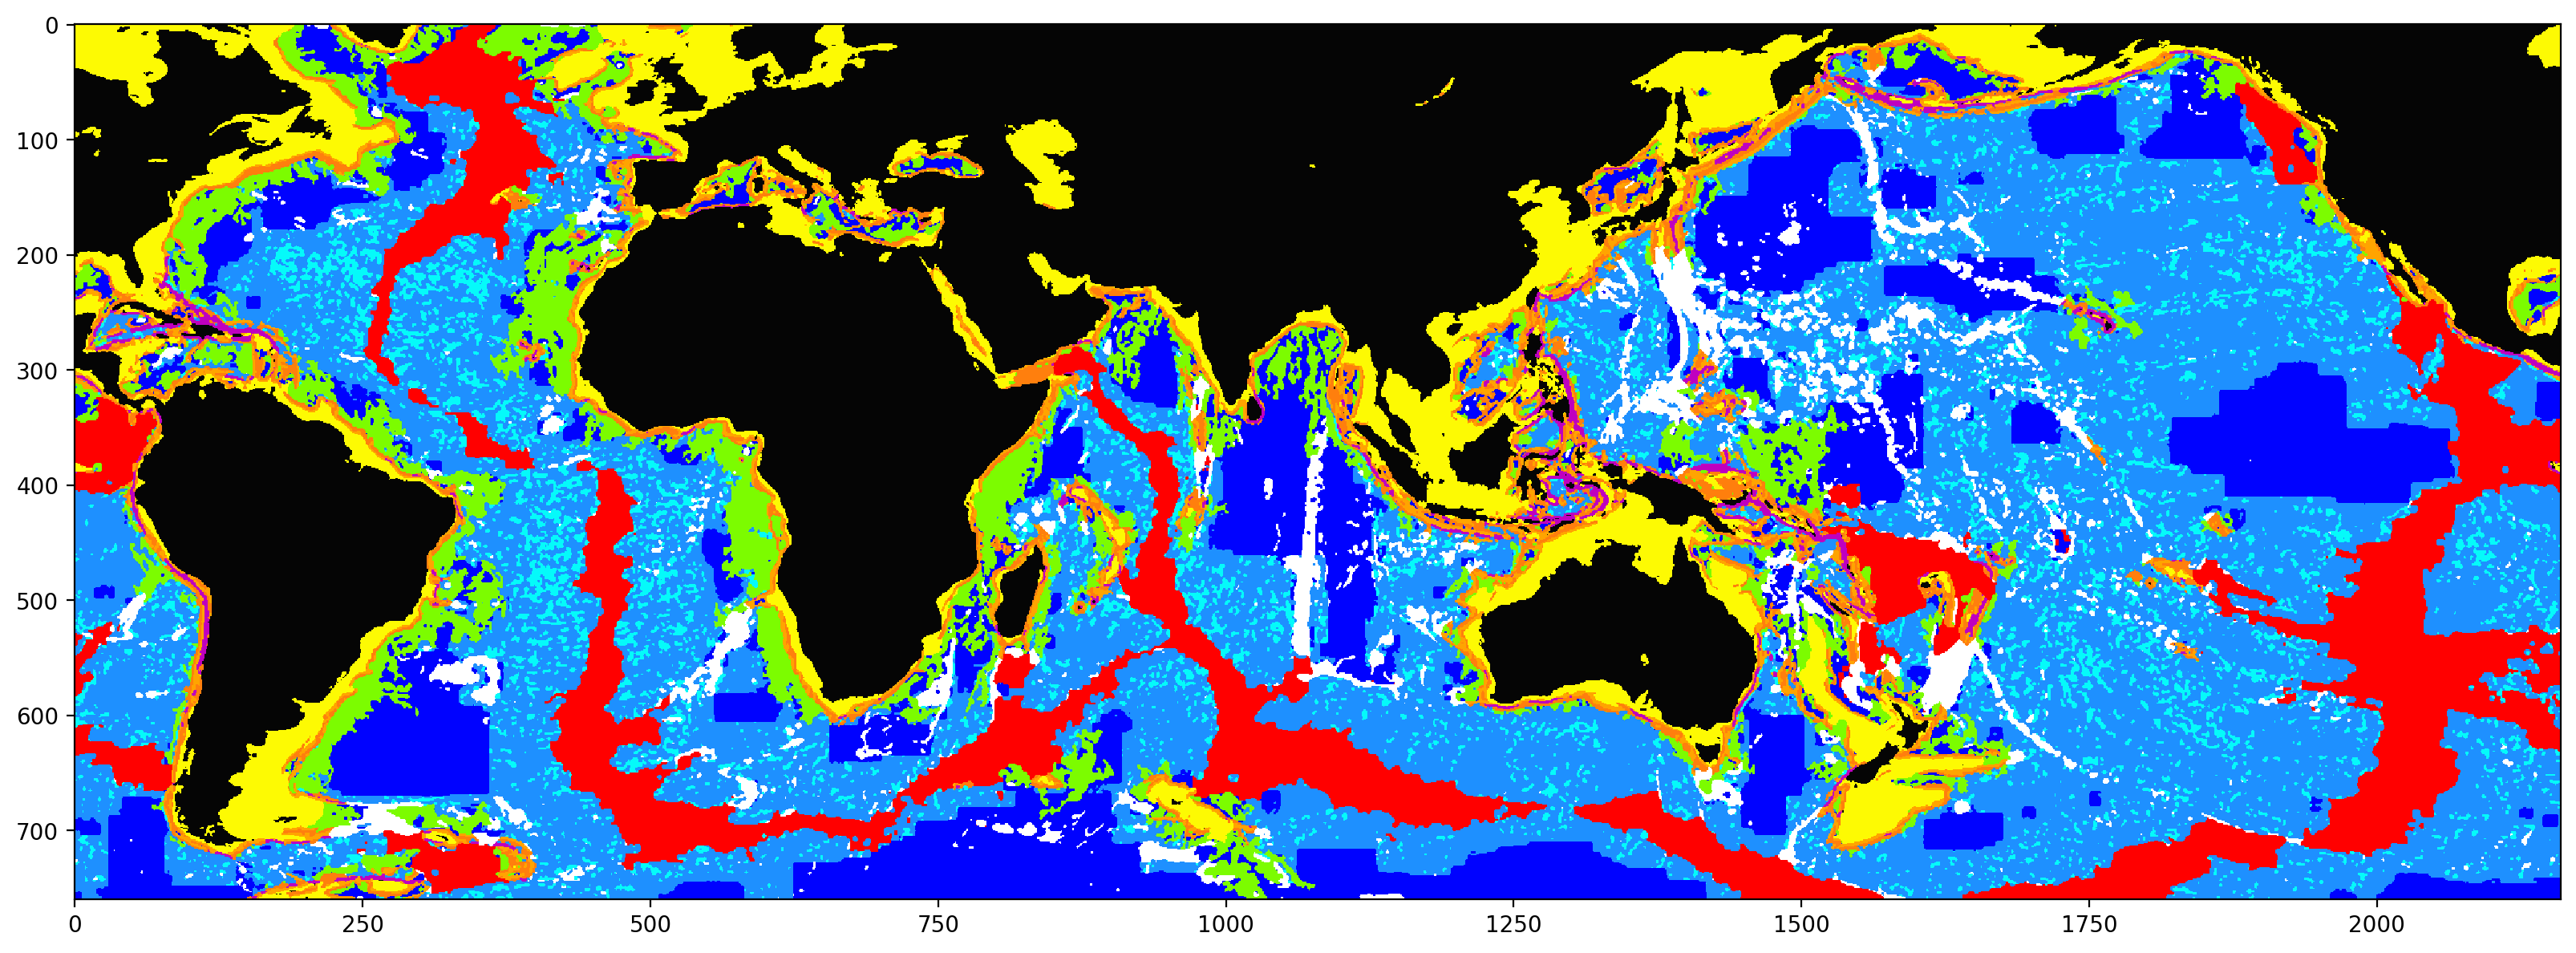

In [249]:
plt.figure(figsize=(20,10),dpi=200)
plt.imshow(fin_c,cmap=c.class_color_map,interpolation='nearest')

In [247]:
imgs=[]
for i in range(95):
    for j in range(102):
        imgs.append(fin_c[8*i:8*i+80,21*j:21*j+210].copy())

In [248]:
cpt=0
for img in imgs:
    np.save(f'types/{cpt}.npy',img)
    img2=img.copy()
    img2[0,0]=0
    img2[0,1]=c.SEAMOUNT
    plt.imsave(f'types/{cpt}.png',img2,cmap='gray')
    cpt+=1

In [289]:
c.SEAMOUNT

10

In [280]:
2160//21

102

In [275]:
fin_c.shape

(760, 2160)

In [237]:
np.save('cla3.npy',classes)
np.save('clafin.npy',fin_c)

In [2]:
fin_c=np.load('clafin.npy')
classes=np.load('cla3.npy')

In [245]:
fin_c[299:306,820:852][fin_c[299:306,820:852]==5]=0

In [191]:
finc_2=np.zeros_like(fin_c)

In [43]:
classes.shape

(3800, 10800)

In [385]:
classes=np.load('sncl.npy')

In [392]:
ridges=dem.elevation[250:-250,:]*(classes==c.MID_OCEANIC_RIDGE)

In [411]:
import OceanPSC.quadratic_parametrisation as qad

In [448]:
importlib.reload(de)

<module 'OceanPSC.DEM' from 'C:\\Users\\nicol\\source\\repos\\OceanPSC\\OceanPSC\\DEM.py'>